# **Análise de Crédito e Inadimplência**

Projeto final do módulo "Python para Análise de Dados", parte integrante do curso de Ciência de Dados da EBAC


# **Etapas**

<ol type="1">
  <li>Contexto</li>
  <li>Análise Exploratória</li>
  <li>Preparação dos Dados</li>
  <li>Visualização e Insights</li>
  <li>Conclusões</li>
</ol>


# 1\. Contexto

O objetivo desta análise é investigar os fatores que contribuem para a inadimplência de um cliente, considerando o comportamento de alguns de seus atributos, como renda, relacionamento com a empresa e histórico financeiro.

Para isso, vamos explorar os dados de crédito disponíveis no seguinte [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Esses dados estão em formato CSV e fornecem informações sobre os clientes de uma instituição financeira. (Fornecidos por [André Perez](https://www.linkedin.com/in/andremarcosperez/))

Especificamente, concentraremos nossa atenção na segunda coluna, denominada "default", que indica se um cliente é adimplente (default = 0) ou inadimplente (default = 1).

Abaixo está uma descrição completa dos atributos presentes no  arquivo CSV:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | Idade do cliente |
| sexo    | Gênero do cliente |
| dependentes | Número de dependentes financeiros |
| escolaridade | Nível de escolaridade |
| estado_civil | Estado civil |
| salario_anual | Faixa do salário mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartão |
| meses_de_relacionamento | Tempo de relacionamento com a instituição |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iterações com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite de crédito do cartão |
| valor_transacoes_12m | Valor total das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


# 2\. Análise Exploratória

Vamos iniciar importando as bibliotecas necessárias e realizando a leitura dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## 2\.1 Schema

Vamos examinar a estrutura e o formato dos dados

In [3]:
linhas, colunas = df.shape
print(f'O arquivo possui {linhas} linhas e {colunas} colunas.')

O arquivo possui 10127 linhas e 16 colunas.


In [4]:
total_clientes = len(df)
adimplentes = df['default'].value_counts()[0]
inadimplentes = df['default'].value_counts()[1]

prop_adimplentes = round(100 * adimplentes / total_clientes, 2)
prop_inadimplentes = round(100 * inadimplentes / total_clientes, 2)

print(f'A proporção de clientes adimplentes é de {prop_adimplentes}% '
    f'({adimplentes} de {total_clientes})')
print(f'A proporção de clientes inadimplentes é de {prop_inadimplentes}% '
    f'({inadimplentes} de {total_clientes})')

A proporção de clientes adimplentes é de 83.93% (8500 de 10127)
A proporção de clientes inadimplentes é de 16.07% (1627 de 10127)


In [5]:
df.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [7]:
# estatísticas descritivas das variáveis numéricas
df.drop('id', axis=1).describe().transpose()


,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [8]:
# estatísticas descritivas das variáveis categóricas
df.describe(include=['object'])

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
count,10127,8608,9378,9015,10127,10127,10127
unique,2,5,3,5,4,9272,10035
top,F,mestrado,casado,menos que $40K,blue,"1.438,21","3.851,51"
freq,5358,3128,4687,3561,9436,11,3


In [9]:
# verifica se há alguma conta duplicada
df['id'].duplicated().any()

False

## 2\.2 Dados faltantes

A seguir, apresentaremos algumas estatísticas sobre os dados ausentes em colunas específicas.

In [10]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [11]:
def total_faltantes(df: pd.DataFrame) -> None:
    qtd_total = df.isna().sum().sum()
    prop_total = df.isna().mean().mean() * 100
    print(f'A base de dados apresenta um total de {qtd_total} dados faltantes '
    f'({prop_total:.2f}%)')

In [12]:
# quantidade total de dados faltantes
total_faltantes(df)

A base de dados apresenta um total de 3380 dados faltantes (2.09%)


In [13]:
def dados_faltantes(df):
    dados_ausentes = df.isna().sum()
    prop_ausentes = 100 * df.isna().mean()

    for col, qtd, prop in zip(df.columns, dados_ausentes, prop_ausentes):
        if qtd > 0:
            print(f'{col}: faltam {qtd} dados ({prop:.2f}%)')

In [14]:
# apresenta os dados faltantes por coluna
dados_faltantes(df)

escolaridade: faltam 1519 dados (15.00%)
estado_civil: faltam 749 dados (7.40%)
salario_anual: faltam 1112 dados (10.98%)


In [15]:
print('Proporção de dados faltantes dos clientes adimplentes:')
dados_faltantes(df[df['default'] == 0])

Proporção de dados faltantes dos clientes adimplentes:
escolaridade: faltam 1263 dados (14.86%)
estado_civil: faltam 620 dados (7.29%)
salario_anual: faltam 925 dados (10.88%)


In [16]:
print('Proporção de dados faltantes dos clientes inadimplentes:')
dados_faltantes(df[df['default'] == 1])

Proporção de dados faltantes dos clientes inadimplentes:
escolaridade: faltam 256 dados (15.73%)
estado_civil: faltam 129 dados (7.93%)
salario_anual: faltam 187 dados (11.49%)


# 3\. Preparação dos Dados

As colunas “valor_transacoes_12m” e “limite_credito” estão sendo erroneamente interpretadas como categóricas. Vamos ajustá-las para que sejam tratadas corretamente como variáveis numéricas. Além disso, após análise, constatamos que a proporção de linhas com dados faltantes não impacta significativamente nossa base de dados. Portanto, podemos excluí-las sem grande prejuízo.

In [17]:
def conv_moeda(df, column):
    df[column] = df[column].str.replace('.', '').str.replace(',', '.').astype(float)

In [18]:
conv_moeda(df, 'limite_credito')
conv_moeda(df, 'valor_transacoes_12m')
df.dropna(inplace=True)

In [19]:
# verifica se ainda há dados faltantes
df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
4,4716.22,816.08
5,4010.69,1088.07


In [21]:
print(f"O total de linhas agora é: {len(df)}")

O total de linhas agora é: 7081


In [22]:
qtd_total_novo = len(df)
qtd_adimplentes_novo, qtd_inadimplentes_novo = df.groupby('default').size()

In [23]:
prop_adimplentes_novo = round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)
prop_inadimplentes_novo = round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)

print(f'A nova proporção de clientes adimplentes é de {prop_adimplentes_novo}% '
    f'({qtd_adimplentes_novo} de {qtd_total_novo})')
print(f'A nova proporção de clientes inadimplentes é de {prop_inadimplentes_novo}% '
    f'({qtd_inadimplentes_novo} de {qtd_total_novo})')

A nova proporção de clientes adimplentes é de 84.28% (5968 de 7081)
A nova proporção de clientes inadimplentes é de 15.72% (1113 de 7081)


In [24]:
df.rename(columns={'idade' : 'Idade', 'sexo' : 'Sexo', 'dependentes' : 'Dependentes', 'escolaridade' : 'Escolaridade', 'estado_civil' : 'Estado_Civil', 'salario_anual' : 'Salário_Anual', 'tipo_cartao' : 'Tipo_Cartão', 'meses_de_relacionamento' : 'Meses_de_Relacionamento', 'qtd_produtos' : 'Quantidade_Produtos', 'iteracoes_12m' : 'Iterações_12m', 'meses_inativo_12m' : 'Meses_Inativo_12m', 'limite_credito' : 'Limite_de_Crédito', 'valor_transacoes_12m' : 'Valor_Transações_12m', 'qtd_transacoes_12m' : 'Quantidade_Transações_12m'}, inplace=True)

In [25]:
# informações gerais sobre as mudanças realizadas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7081 non-null   int64  
 1   default                    7081 non-null   int64  
 2   Idade                      7081 non-null   int64  
 3   Sexo                       7081 non-null   object 
 4   Dependentes                7081 non-null   int64  
 5   Escolaridade               7081 non-null   object 
 6   Estado_Civil               7081 non-null   object 
 7   Salário_Anual              7081 non-null   object 
 8   Tipo_Cartão                7081 non-null   object 
 9   Meses_de_Relacionamento    7081 non-null   int64  
 10  Quantidade_Produtos        7081 non-null   int64  
 11  Iterações_12m              7081 non-null   int64  
 12  Meses_Inativo_12m          7081 non-null   int64  
 13  Limite_de_Crédito          7081 non-null   float64
 

# 4\. Visualização e Insights

Nesta etapa, vamos criar algumas visualizações para correlacionar os atributos que procuram explicar a coluna 'default'. Alguns dados não serão utilizados nas análises, em conformidade com a LGPD.

In [26]:
df_adimplente = df[df['default'] == 0]

In [27]:
df_inadimplente = df[df['default'] == 1]

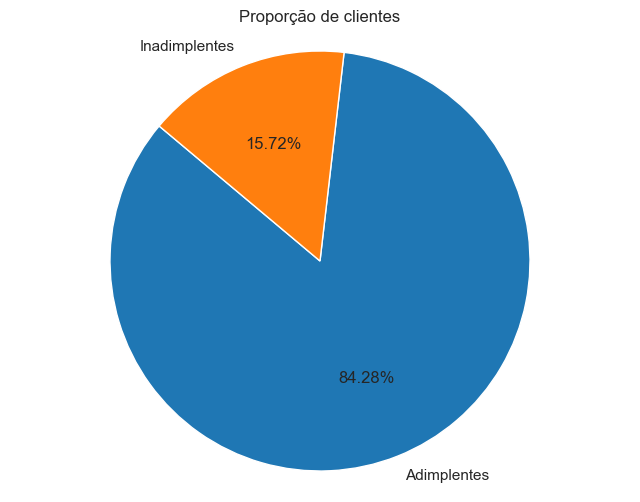

In [28]:
plt.figure(figsize=(8, 6))
plt.pie([prop_adimplentes_novo, prop_inadimplentes_novo],
        labels=['Adimplentes', 'Inadimplentes'],
        colors=['#1f77b4', '#ff7f0e'],
        autopct='%1.2f%%',
        startangle=140)
plt.title('Proporção de clientes')
plt.axis('equal')

plt.show()

## 4\.1 Visualizações Categóricas

- Escolaridade

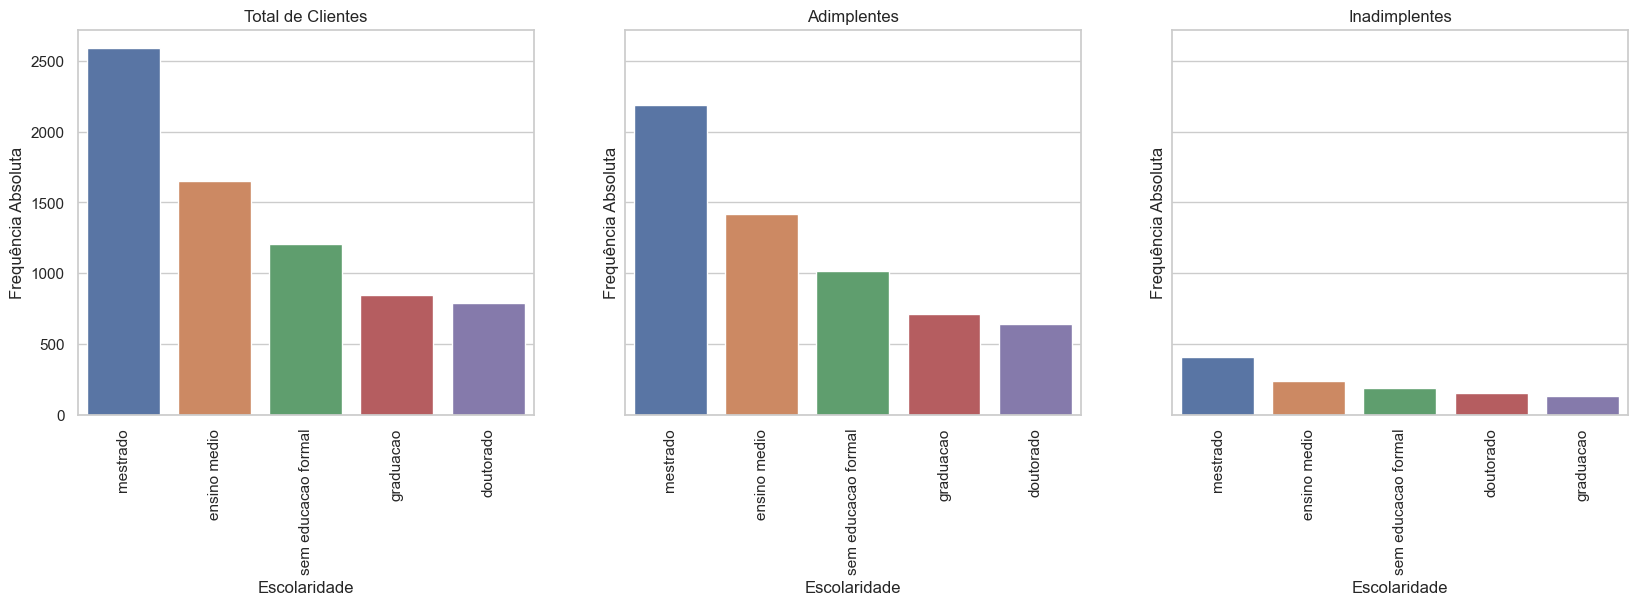

In [29]:
coluna = 'Escolaridade'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    frequencia_absoluta = dataframe[coluna].value_counts()
    sns.barplot(x=frequencia_absoluta.index, y=frequencia_absoluta.values, ax=eixos[eixo])
    eixos[eixo].set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    eixos[eixo].tick_params(axis='x', rotation=90)

plt.show()

- Estado Civil

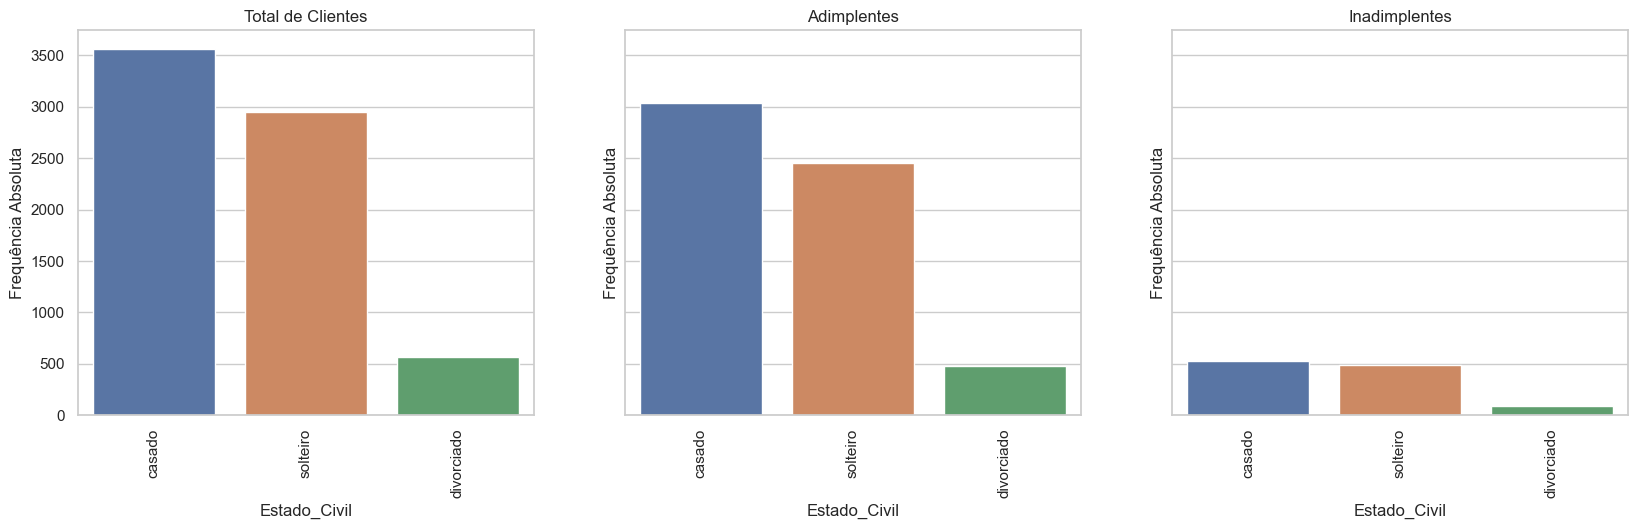

In [30]:
coluna = 'Estado_Civil'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    frequencia_absoluta = dataframe[coluna].value_counts()
    sns.barplot(x=frequencia_absoluta.index, y=frequencia_absoluta.values, ax=eixos[eixo])
    eixos[eixo].set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    eixos[eixo].tick_params(axis='x', rotation=90)

plt.show()

- Salário Anual

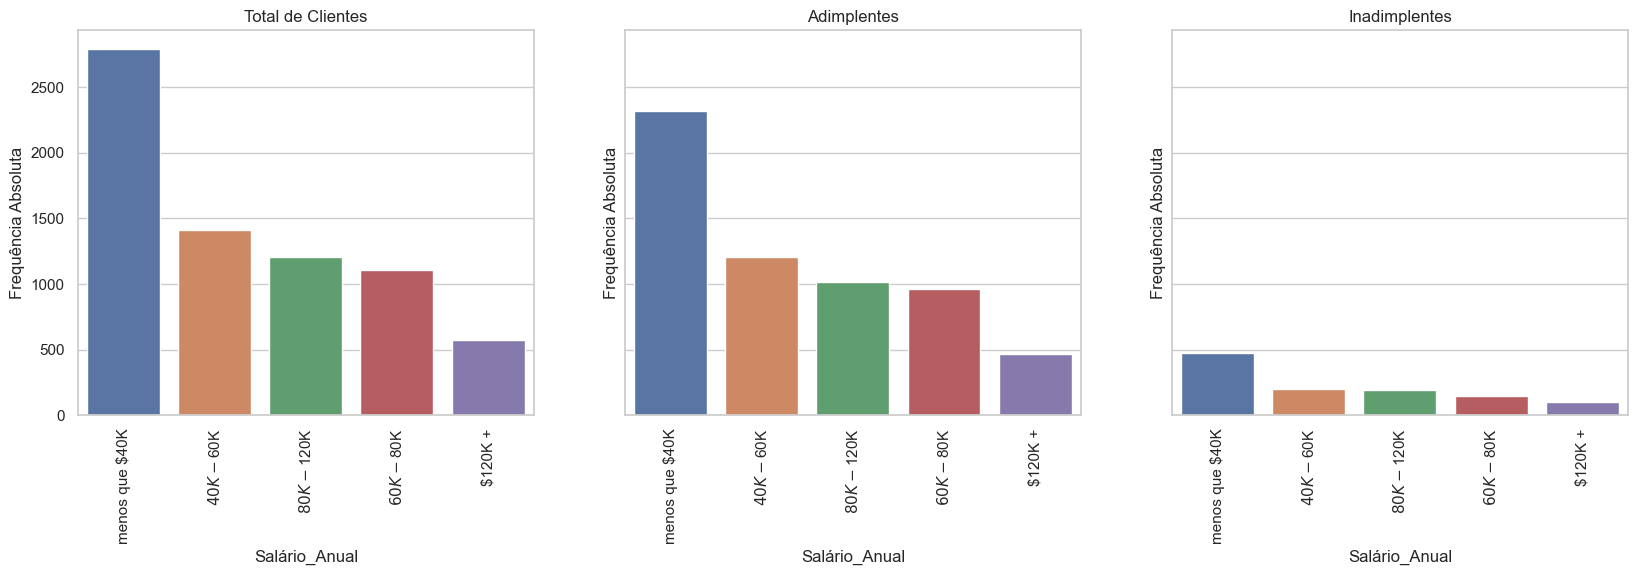

In [31]:
coluna = 'Salário_Anual'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    frequencia_absoluta = dataframe[coluna].value_counts()
    sns.barplot(x=frequencia_absoluta.index, y=frequencia_absoluta.values, ax=eixos[eixo])
    eixos[eixo].set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    eixos[eixo].tick_params(axis='x', rotation=90)

plt.show()

- Tipo do Cartão

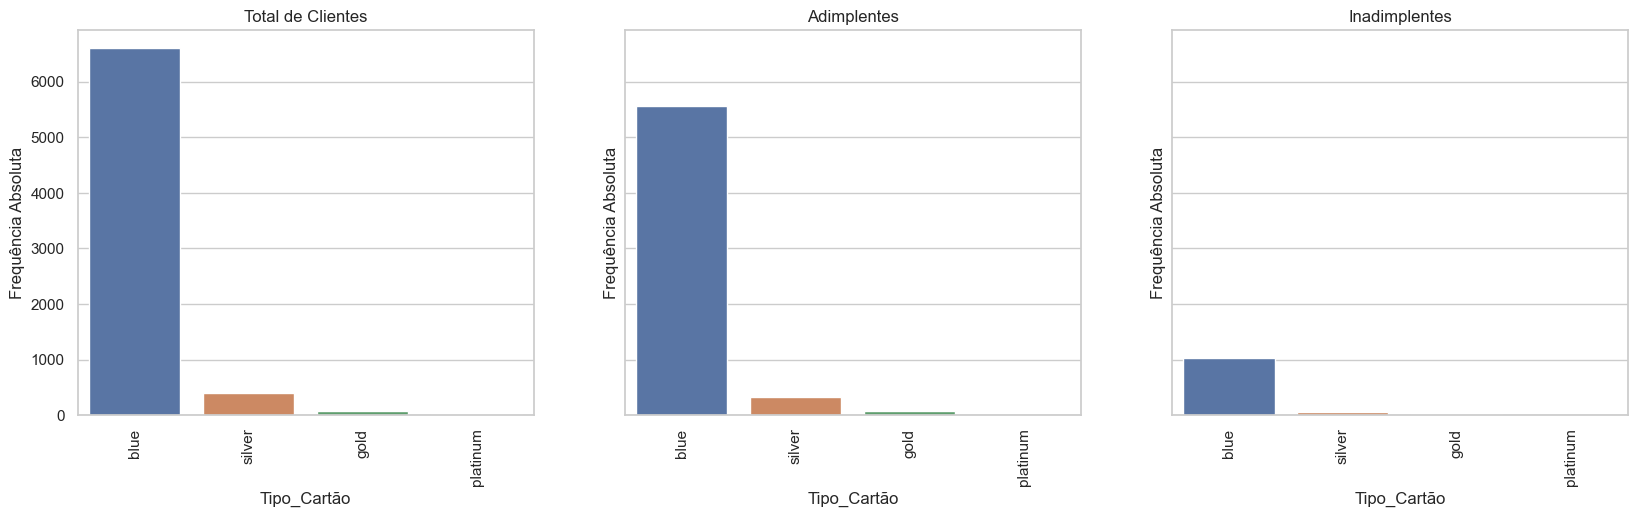

In [32]:
coluna = 'Tipo_Cartão'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    frequencia_absoluta = dataframe[coluna].value_counts()
    sns.barplot(x=frequencia_absoluta.index, y=frequencia_absoluta.values, ax=eixos[eixo])
    eixos[eixo].set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    eixos[eixo].tick_params(axis='x', rotation=90)

plt.show()

## 4\.2 Visualizações Numéricas

In [33]:
df_corr = df[['Meses_de_Relacionamento', 'Idade', 'Dependentes', 
                'Quantidade_Produtos', 'Iterações_12m','Meses_Inativo_12m', 
                'Limite_de_Crédito', 'Valor_Transações_12m',
                'Quantidade_Transações_12m']].corr()
df_corr

,Meses_de_Relacionamento,Idade,Dependentes,Quantidade_Produtos,Iterações_12m,Meses_Inativo_12m,Limite_de_Crédito,Valor_Transações_12m,Quantidade_Transações_12m
Meses_de_Relacionamento,1.000000,0.791271,-0.112368,-0.016751,-0.011054,0.071305,0.020103,-0.037625,-0.050445
Idade,0.791271,1.000000,-0.128232,-0.022067,-0.023971,0.057870,0.024563,-0.045859,-0.069883
Dependentes,-0.112368,-0.128232,1.000000,-0.043257,-0.055625,-0.022804,0.081378,0.023234,0.057056
Quantidade_Produtos,-0.016751,-0.022067,-0.043257,1.000000,0.070539,0.005072,-0.074876,-0.348024,-0.246749
Iterações_12m,-0.011054,-0.023971,-0.055625,0.070539,1.000000,0.026269,0.016737,-0.121018,-0.155612
Meses_Inativo_12m,0.071305,0.057870,-0.022804,0.005072,0.026269,1.000000,-0.015728,-0.039977,-0.048169
Limite_de_Crédito,0.020103,0.024563,0.081378,-0.074876,0.016737,-0.015728,1.000000,0.171592,0.080834
Valor_Transações_12m,-0.037625,-0.045859,0.023234,-0.348024,-0.121018,-0.039977,0.171592,1.000000,0.810074
Quantidade_Transações_12m,-0.050445,-0.069883,0.057056,-0.246749,-0.155612,-0.048169,0.080834,0.810074,1.000000


<Axes: >

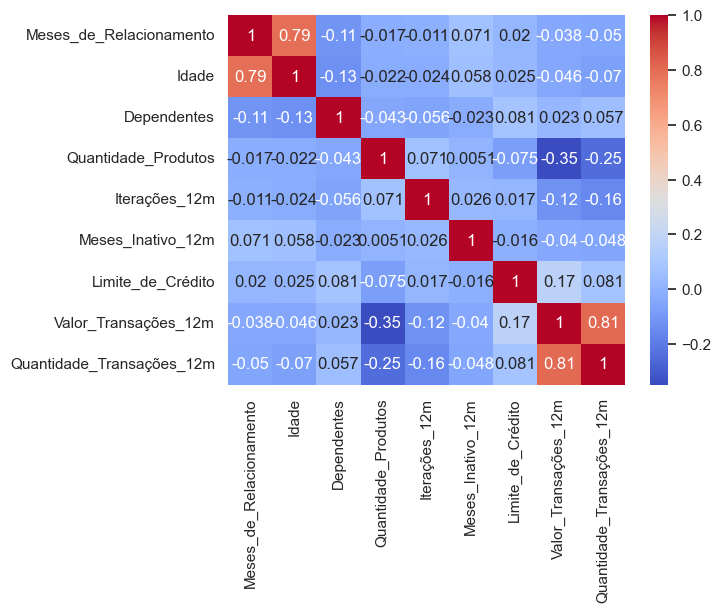

In [34]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

- Idade

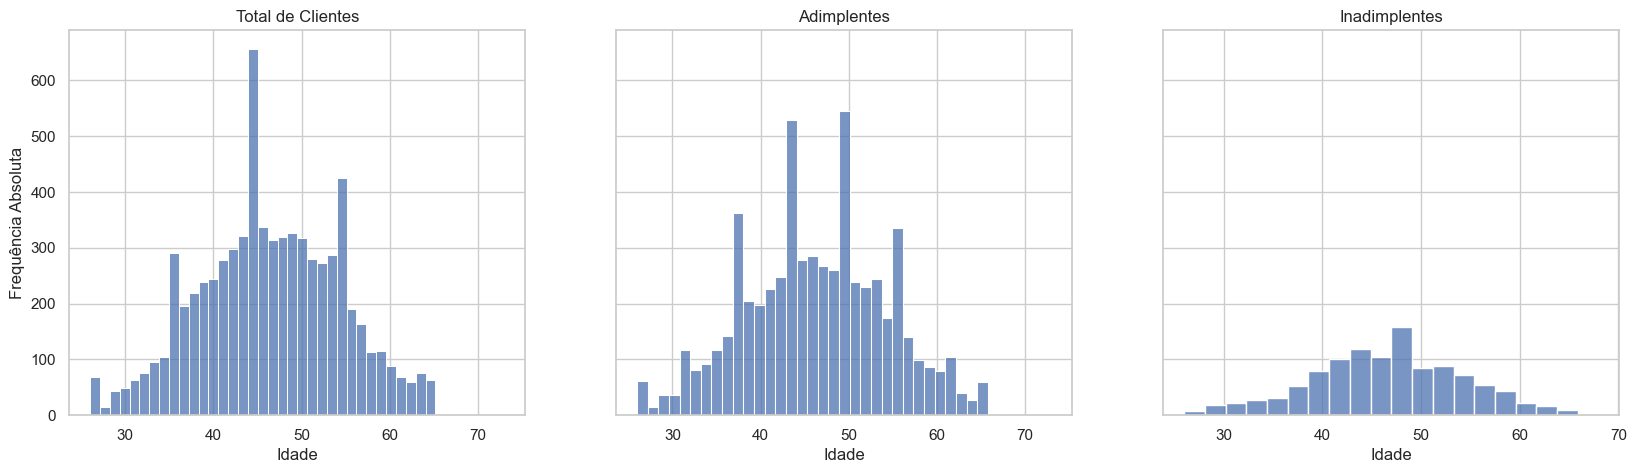

In [35]:
coluna = 'Idade'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    f.set_ylim(0, None)

plt.show()

- Meses de Relacionamento

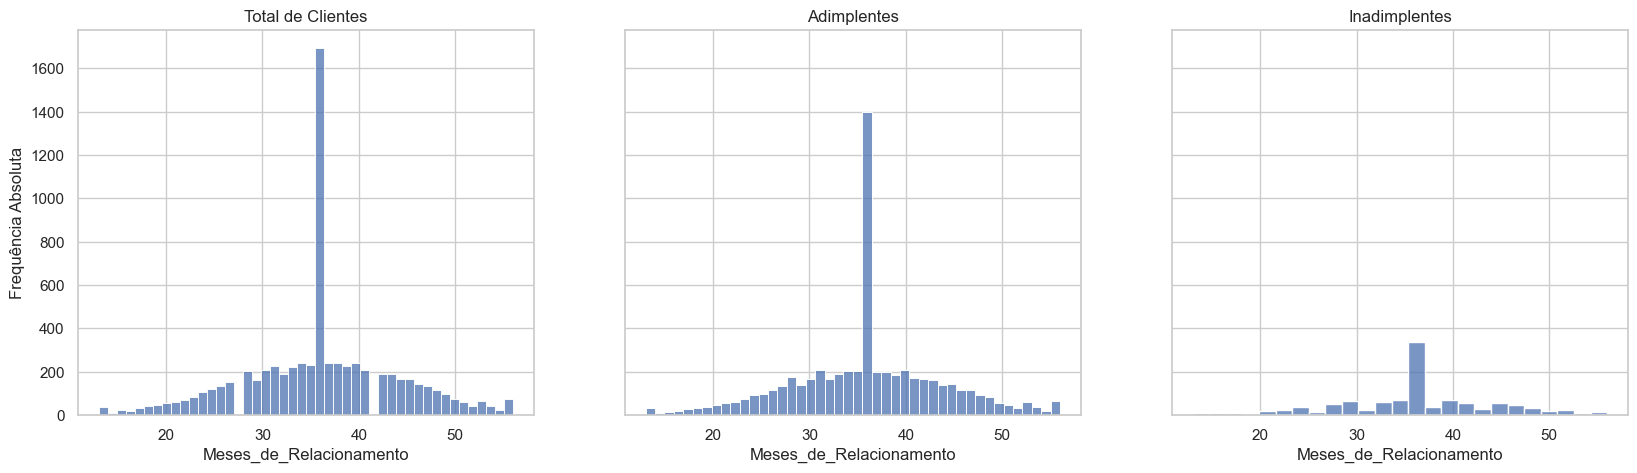

In [36]:
coluna = 'Meses_de_Relacionamento'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    f.set_ylim(0, None)

plt.show()

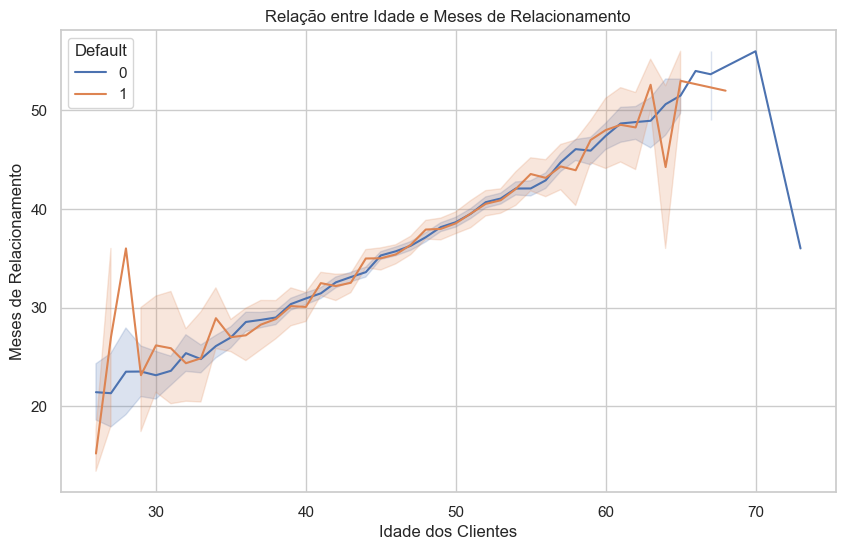

In [37]:
df_sorted = df.sort_values('Idade')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Idade', y='Meses_de_Relacionamento', hue='default', data=df_sorted)
plt.title('Relação entre Idade e Meses de Relacionamento')
plt.xlabel('Idade dos Clientes')
plt.ylabel('Meses de Relacionamento')
plt.legend(title='Default', loc='best')
plt.grid(True)

plt.show()

- Valor das transações nos últimos 12 meses

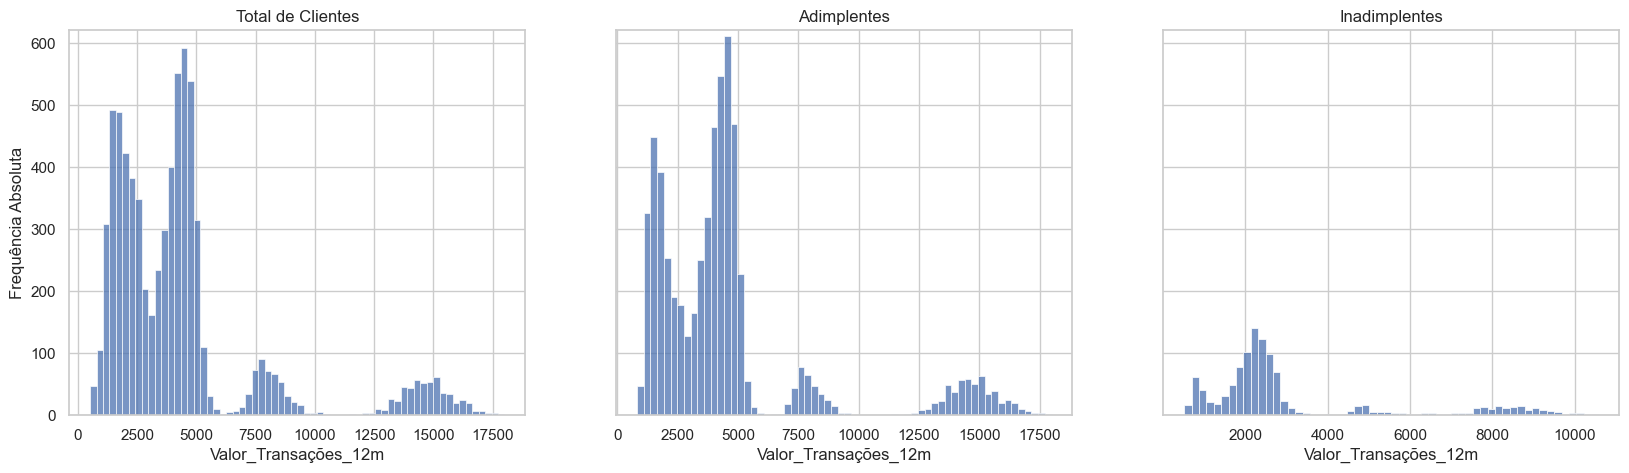

In [38]:
coluna = 'Valor_Transações_12m'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    f.set_ylim(0, None)

plt.show()

- Quantidade de transações nos últimos 12 meses

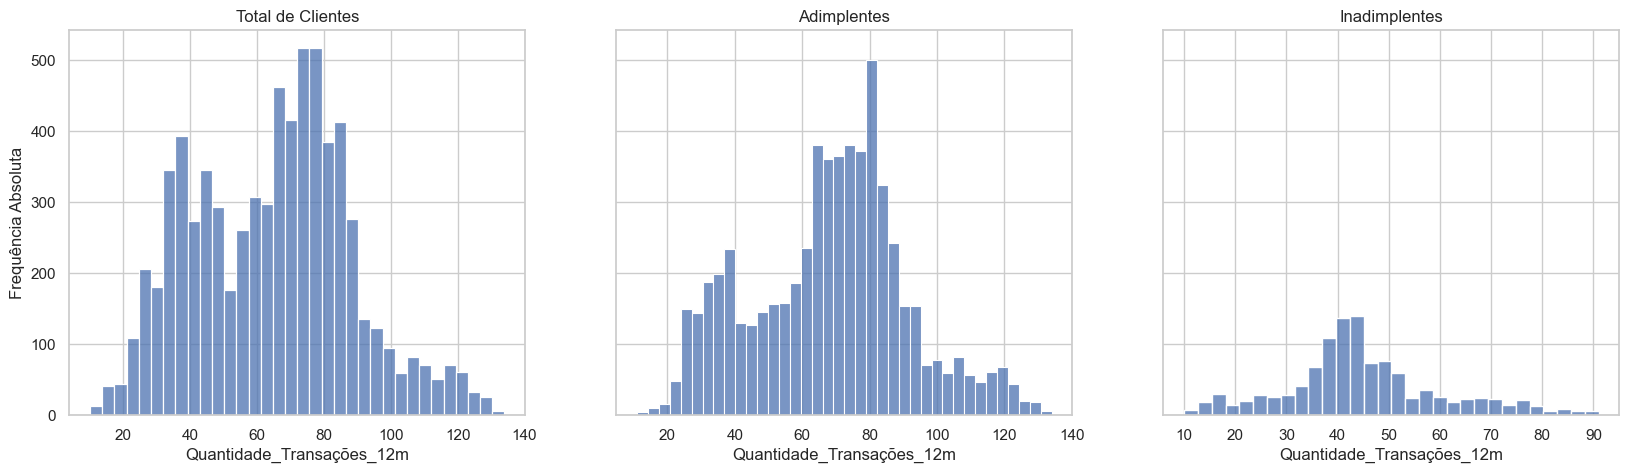

In [39]:
coluna = 'Quantidade_Transações_12m'
titulos = ['Total de Clientes', 'Adimplentes', 'Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna, ylabel='Frequência Absoluta')
    f.set_ylim(0, None)

plt.show()

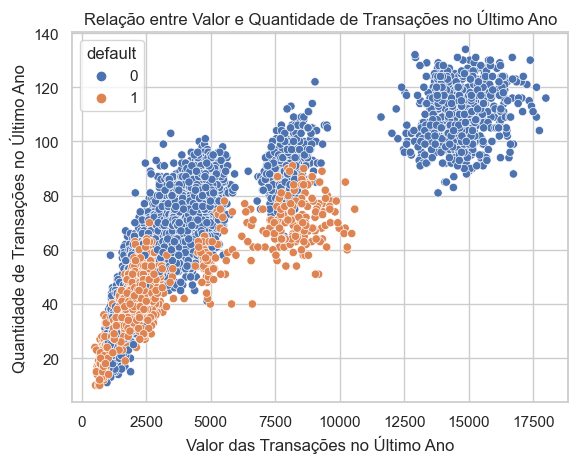

In [40]:
sns.scatterplot(x='Valor_Transações_12m', y='Quantidade_Transações_12m', data=df, hue='default')
plt.title('Relação entre Valor e Quantidade de Transações no Último Ano')
plt.xlabel('Valor das Transações no Último Ano')
plt.ylabel('Quantidade de Transações no Último Ano')

plt.show()

# 5\. Conclusões

As conclusões apresentadas a seguir derivam de uma análise detalhada dos dados fornecidos, que foram explorados e examinados com o objetivo de entender os padrões e tendências relacionados à inadimplência dos clientes. É importante ressaltar que essas conclusões refletem apenas os resultados obtidos a partir da análise do banco de dados disponível e não devem ser interpretadas como indicadores de total causalidade. Embora forneçam insights valiosos sobre os fatores associados à inadimplência, outras variáveis e fatores externos podem influenciar os resultados observados. Portanto, essas conclusões devem ser consideradas como parte de um quadro mais amplo e sujeitas a investigações adicionais e análises aprofundadas.

- Ao analisar as variáveis categóricas (Escolaridade, Estado Civil, Salário Anual e Limite do Cartão), não foi possível identificar nenhum padrão que justificasse a inadimplência dos clientes.

-  Observou-se uma tendência de aumento do número de meses de relacionamento à medida que a idade dos clientes aumenta. Isso sugere que clientes com mais idade tendem a ter um relacionamento mais longo com a empresa.

- Verificou-se uma tendência de inadimplência entre os clientes com até 30 anos de idade e menos de 40 meses de relacionamento com a instituição financeira.

- Ao analisar as quantidades de transações nos últimos 12 meses, percebemos que os clientes que realizaram entre 20 e 60 transações tendem a se tornar inadimplentes.

- A análise dos valores de transações nos últimos 12 meses indicou que os clientes com transações entre R$ 1.000 e R$ 3.000 estão mais propensos à inadimplência.

- Notou-se que a maioria dos clientes com 60 a 80 transações no último ano e um valor de transações entre R$ 7.500 e R$ 10.000 são inadimplentes.

- Por outro lado, clientes com mais de 100 transações no último ano e com valores de transações superiores a R$ 12.000 não indicam nenhum sinal de inadimplência.
